Linear Regression -- MSE: 25.26, R^2: 0.15
Random Forest (default) -- MSE: 28.16, R^2: 0.05


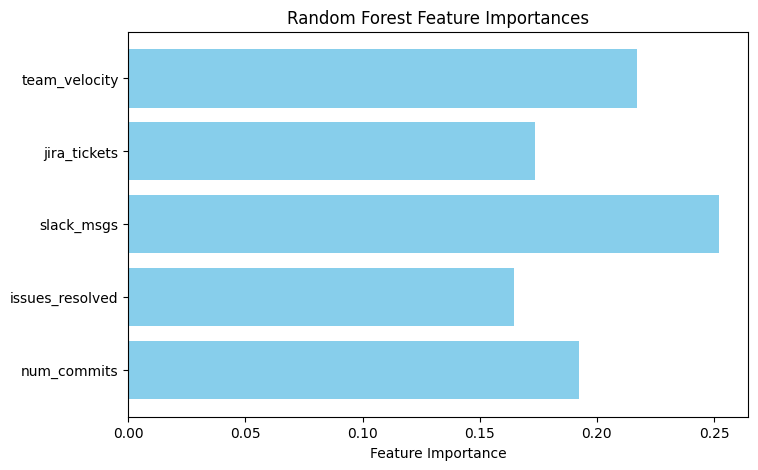

Random Forest (tuned) -- MSE: 26.26, R^2: 0.11
Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("simulated_productivity_dataset.csv")

# Features and target
X = df.drop("productivity_score", axis=1)
y = df["productivity_score"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression baseline
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -- MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")

# 2. Random Forest with default parameters
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest (default) -- MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")

# 3. Feature importance plot from Random Forest
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

# 4. Random Forest hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Random Forest (tuned) -- MSE: {mse_best_rf:.2f}, R^2: {r2_best_rf:.2f}")
print("Best parameters found:", grid_search.best_params_)


In [ ]:
import joblib

# Linear Regression performed best
joblib.dump(lr, "linear_regression_productivity_model.pkl")
print("Best model saved as 'linear_regression_productivity_model.pkl'")


Best model saved as 'linear_regression_productivity_model.pkl'
